C:\Users\Joshua\AppData\Local\Temp\ipykernel_20188\4200310042.py:25: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # Open the raster file with gpd
C:\Users\Joshua\AppData\Local\Temp\ipykernel_20188\4200310042.py:32: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = ax.pcolormesh(lons, lats, ch4, cmap='hot', shading='auto') # Plot the concentration data set onto a color mesh (color plot with a non-rectangular grid) that plots data with inbuilt 'hot' color mapping and auto shading


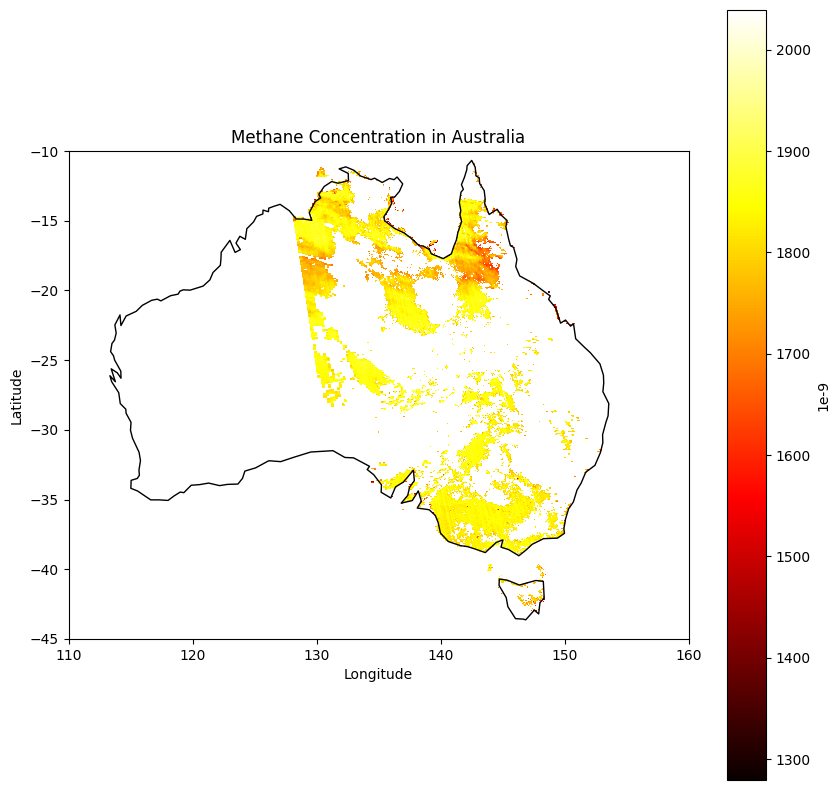

In [6]:
import netCDF4 as nc
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# Assume data have been queired and downloaded
# Open and read nc file into a nc4 dataset
nc_file_1 = "../Datasets/S5P_OFFL_L2__CH4____20230514T034638_20230514T052808_28925_03_020500_20230515T195331.nc"
fh = nc.Dataset(nc_file_1, mode='r')

# Navigate to Product in the groups attribute and retrieve the longitude, latitude and methane mixing ratio
lons = fh.groups['PRODUCT'].variables['longitude'][:][0, :, :]
lats = fh.groups['PRODUCT'].variables['latitude'][:][0, :, :]
ch4 = fh.groups['PRODUCT'].variables['methane_mixing_ratio'][0, :, :]

# Set a figure to plot on
fig, ax = plt.subplots(figsize=(10, 10)) # Create a figure with one axes

###
# Plot the Base Map
# 
# The base map utilizes a low resolution raster of the earth obtained from:
# https://www.naturalearthdata.com/
# ##
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # Open the raster file with gpd
australia = world[world['name'] == 'Australia'] # Navigate file to obtain Australia continent

australia.boundary.plot(ax=ax, linewidth=1, color='black') # Plot the base map onto the figure 

# Plot the methane data on the map of Australia
ch4_units = fh.groups['PRODUCT'].variables['methane_mixing_ratio'].units # Retrieve methane concentration units from nc file
mesh = ax.pcolormesh(lons, lats, ch4, cmap='hot', shading='auto') # Plot the concentration data set onto a color mesh (color plot with a non-rectangular grid) that plots data with inbuilt 'hot' color mapping and auto shading
cbar = plt.colorbar(mesh, ax=ax, label=ch4_units) # Create a color bar and assign it to the concentration plot. 

ax.set_title('Methane Concentration in Australia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim([110, 160])
ax.set_ylim([-45, -10])

plt.show() #
